In [1]:
import os

#directory = "postselection_bench_v20_3"
directory = "postselection_bench_v24_lep_tau_mjj"
import os
if not os.path.exists(directory):
    os.makedirs(directory)

In [2]:
for i in range(0,276):
    csv_file = "distrdf_monitor_{}.csv".format(i)
    path = directory + "/" + csv_file
    os.popen("davix-get davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/{} {} -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/".format(path, path))
    csv_file = "distrdf_runtime_{}.csv".format(i)
    path = directory + "/" + csv_file
    os.popen("davix-get davs://t2-xrdcms.lnl.infn.it:2880/pnfs/lnl.infn.it/data/cms/store/user/ttedesch/{} {} -E /opt/workspace/persistent-storage/proxy --capath /cvmfs/cms.cern.ch/grid/etc/grid-security/certificates/".format(path, path))

In [3]:
import pandas as pd
import os

for i in range(0,276):
    #print(i)
    csv_file = "distrdf_monitor_{}.csv".format(i)
    #csv_file = "main_monitor_{}.csv".format(i)

    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    if i == 0:
        df = pd.read_csv(path)
    else:
        df = pd.concat([df, pd.read_csv(path)])
'''       
for i in range(0,20):
    #print(i)
    csv_file = "GluGlu_monitor_{}.csv".format(i)
    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    df = pd.concat([df, pd.read_csv(path)])
    
for i in range(0,20):
    #print(i)
    csv_file = "WZ_monitor_{}.csv".format(i)
    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    df = pd.concat([df, pd.read_csv(path)])
'''

'       \nfor i in range(0,20):\n    #print(i)\n    csv_file = "GluGlu_monitor_{}.csv".format(i)\n    path = directory + "/" + csv_file\n    if os.stat(path).st_size == 0:\n        continue\n    df = pd.concat([df, pd.read_csv(path)])\n    \nfor i in range(0,20):\n    #print(i)\n    csv_file = "WZ_monitor_{}.csv".format(i)\n    path = directory + "/" + csv_file\n    if os.stat(path).st_size == 0:\n        continue\n    df = pd.concat([df, pd.read_csv(path)])\n'

In [4]:
for i in range(0,276):
    #print(i)
    csv_file = "distrdf_runtime_{}.csv".format(i)
    #csv_file = "main_runtime_{}.csv".format(i)

    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    if i == 0:
        df_runtime = pd.read_csv(path)
    else:
        df_runtime = pd.concat([df_runtime, pd.read_csv(path)])
'''        
for i in range(0,20):
    #print(i)
    csv_file = "GluGlu_runtime_{}.csv".format(i)
    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    df_runtime = pd.concat([df_runtime, pd.read_csv(path)])
    
for i in range(0,20):
    #print(i)
    csv_file = "WZ_runtime_{}.csv".format(i)
    path = directory + "/" + csv_file
    if os.stat(path).st_size == 0:
        continue
    df_runtime = pd.concat([df_runtime, pd.read_csv(path)])
'''

'        \nfor i in range(0,20):\n    #print(i)\n    csv_file = "GluGlu_runtime_{}.csv".format(i)\n    path = directory + "/" + csv_file\n    if os.stat(path).st_size == 0:\n        continue\n    df_runtime = pd.concat([df_runtime, pd.read_csv(path)])\n    \nfor i in range(0,20):\n    #print(i)\n    csv_file = "WZ_runtime_{}.csv".format(i)\n    path = directory + "/" + csv_file\n    if os.stat(path).st_size == 0:\n        continue\n    df_runtime = pd.concat([df_runtime, pd.read_csv(path)])\n'

In [5]:
df_runtime["rate"] = df_runtime['processed_entries']/df_runtime['runtime_event_loop']

In [6]:
df_runtime["overall_rate"] = df_runtime['processed_entries']/(df_runtime['runtime_setup'] + df_runtime['runtime_rdf_creation'] + df_runtime['runtime_event_loop'])

In [7]:
df_runtime

,task_id,hostname,processed_entries,runtime_mapper,runtime_setup,runtime_rdf_creation,runtime_event_loop,rate,overall_rate
0,0,wl-07-36.lnl.infn.it,75625,174.830168,0.354480,0.198507,174.277040,433.935532,432.562994
0,1,wl-07-35.lnl.infn.it,34446,90.194657,0.423885,0.286375,89.484236,384.939309,381.908005
0,2,wl-07-35.lnl.infn.it,34735,77.782428,0.230621,0.140570,77.411094,448.708295,446.566979
0,3,wl-07-34.lnl.infn.it,30588,262.453207,95.168773,2.210068,165.062833,185.311250,116.551611
0,4,wl-07-34.lnl.infn.it,31920,239.997321,95.662709,2.132185,142.188066,224.491414,133.009444
...,...,...,...,...,...,...,...,...,...
0,271,wl-07-38.lnl.infn.it,10122,48.210833,0.296391,0.142596,47.771642,211.883025,209.953701
0,272,wl-07-38.lnl.infn.it,273276,413.831901,0.321826,1.218734,412.291201,662.822780,660.355308
0,273,wl-07-34.lnl.infn.it,34758,273.779460,100.444245,1.982963,171.338526,202.861556,126.962566
0,274,wl-07-39.lnl.infn.it,19921,74.756065,1.252596,0.391120,73.112182,272.471693,266.480646


In [8]:
(df_runtime['overall_rate']*df_runtime['processed_entries']).sum()/df_runtime['processed_entries'].sum()

404.19313658707983

In [9]:
(df_runtime['rate']*df_runtime['processed_entries']).sum()/df_runtime['processed_entries'].sum()

428.2570715861264

In [10]:
df_runtime['processed_entries'].sum()

13175848

In [11]:
#df_runtime['processed_entries'].sum() / 

In [12]:
(df_runtime['runtime_setup'] + df_runtime['runtime_rdf_creation'] + df_runtime['runtime_event_loop']).sum()/3600/92

0.13913887024429686

In [13]:
import numpy as np
df_grouped = df.groupby(['task_id']).agg(mean_memory_rss=('memory_rss',np.mean),mean_cpu_percent=('cpu_percent',np.mean), mean_net_read=('net_read',np.max),  hostname=('hostname', np.max))

In [14]:
df_grouped

,mean_memory_rss,mean_cpu_percent,mean_net_read,hostname
task_id,,,,
0,8.711985e+08,99.259429,29894614188266,wl-07-36.lnl.infn.it
1,1.122971e+09,125.213333,20074300832329,wl-07-35.lnl.infn.it
2,1.127941e+09,109.596154,20074681024193,wl-07-35.lnl.infn.it
3,6.683867e+08,97.378626,31331720770969,wl-07-34.lnl.infn.it
4,6.160205e+08,91.121757,31331517547573,wl-07-34.lnl.infn.it
...,...,...,...,...
271,7.761776e+08,100.243750,28571154883491,wl-07-38.lnl.infn.it
272,9.611624e+08,103.526392,28573725314615,wl-07-38.lnl.infn.it
273,6.416824e+08,93.809524,31331927616707,wl-07-34.lnl.infn.it


In [15]:
df_grouped_full = df.groupby(['task_id'])

task_id
0      AxesSubplot(0.125,0.125;0.775x0.755)
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
271    AxesSubplot(0.125,0.125;0.775x0.755)
272    AxesSubplot(0.125,0.125;0.775x0.755)
273    AxesSubplot(0.125,0.125;0.775x0.755)
274    AxesSubplot(0.125,0.125;0.775x0.755)
275    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cpu_percent, Length: 276, dtype: object

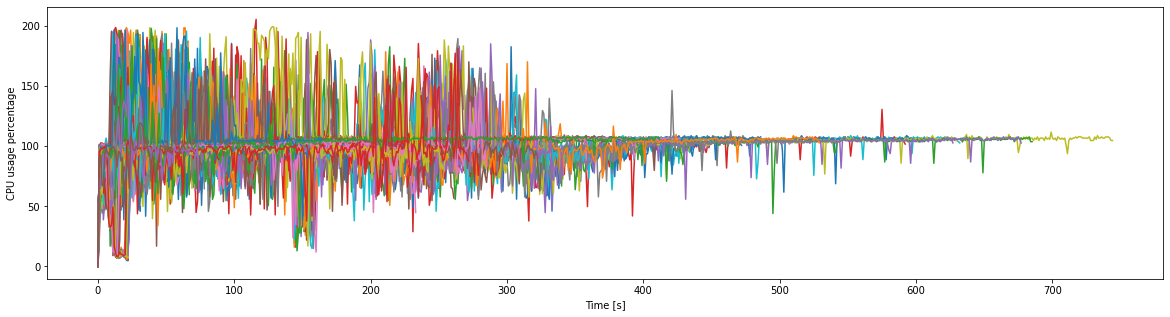

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
df_grouped_full['cpu_percent'].plot(ax = ax, xlabel = "Time [s]", ylabel = "CPU usage percentage")

task_id
0      AxesSubplot(0.125,0.125;0.775x0.755)
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
271    AxesSubplot(0.125,0.125;0.775x0.755)
272    AxesSubplot(0.125,0.125;0.775x0.755)
273    AxesSubplot(0.125,0.125;0.775x0.755)
274    AxesSubplot(0.125,0.125;0.775x0.755)
275    AxesSubplot(0.125,0.125;0.775x0.755)
Name: memory_rss, Length: 276, dtype: object

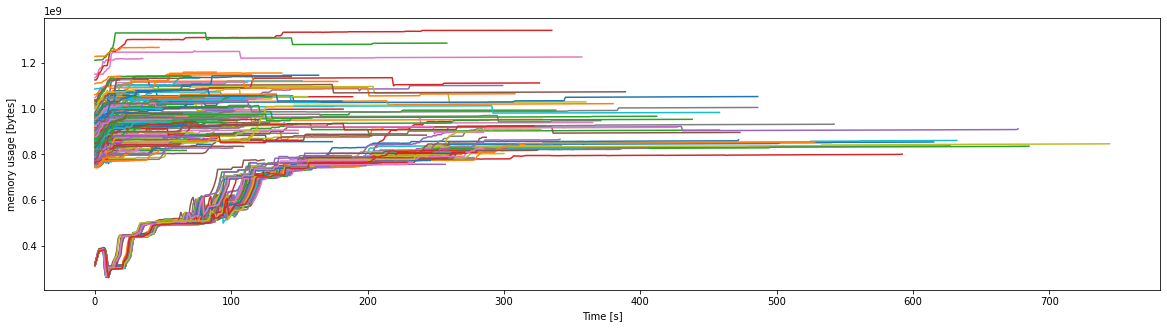

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,5))
df_grouped_full['memory_rss'].plot(ax = ax, xlabel = "Time [s]", ylabel = "memory usage [bytes]")

<AxesSubplot:xlabel='Time [s]', ylabel='memory usage [bytes]'>

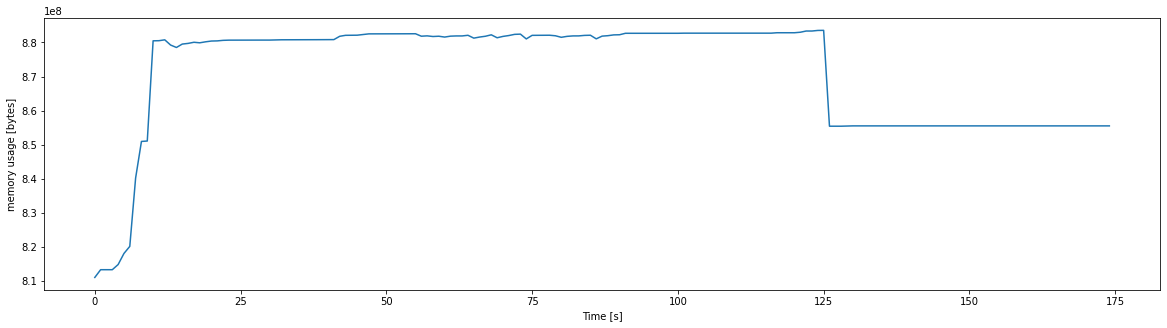

In [18]:
df[df["task_id"] == 0]['memory_rss'].plot(figsize=(20,5), xlabel = "Time [s]", ylabel = "memory usage [bytes]")

<AxesSubplot:xlabel='Time [s]', ylabel='cpu usage percentage'>

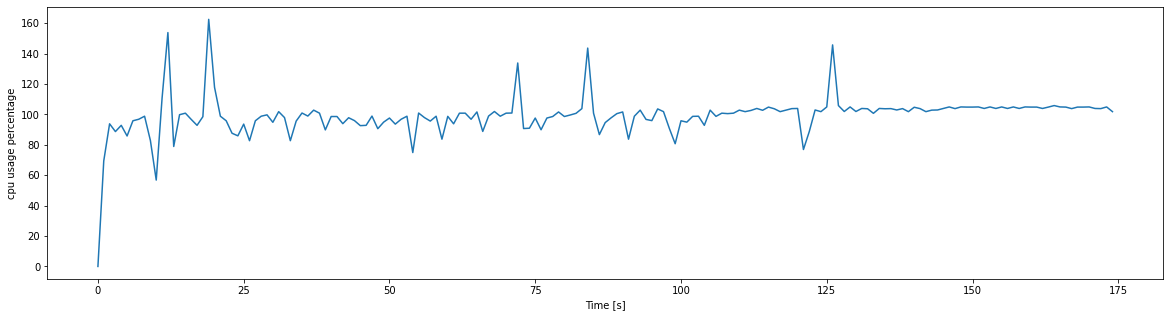

In [19]:
df[df["task_id"] == 0]['cpu_percent'].plot(figsize=(20,5), xlabel = "Time [s]", ylabel = "cpu usage percentage")

In [20]:
a

NameError: name 'a' is not defined